<a href="https://colab.research.google.com/github/Amit-Singh-Rajput/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Solution_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Importing Libraries**

In [228]:
#Importing required libraries
import pandas as pd
import numpy as np

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing datetime for correctly formatting the date
from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

#For Model Building
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

#For Model Evaluation
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

#For Handling Warnings
import warnings
warnings.filterwarnings('ignore')

**Mounting Drive**

In [229]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [230]:
#csv file location
path = '/content/drive/MyDrive/AlmaBetter/Projects/Bike Sharing Demand Prediction/SeoulBikeData.csv'

**Reading Data and Storing into Dataframe**

In [231]:
bike_sharing_df = pd.read_csv(path, encoding = 'unicode_escape')

# **Exploring Dataset**

In [232]:
#Checking top 5 rows of dataset
bike_sharing_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [233]:
#Checking bottom 5 rows of dataset
bike_sharing_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [234]:
#Checking Shape of Dataset
bike_sharing_df.shape

(8760, 14)

In [235]:
#Printing the attributes
print("Features of the dataset: ")
bike_sharing_df.columns

Features of the dataset: 


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [236]:
#Understanding the datatype of each attribute
bike_sharing_df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [237]:
#Detailed information about dataset
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [238]:
#Finding total number of unique values of feature
bike_sharing_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [239]:
#Analysing both categorical and numerical values in dataset
bike_sharing_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [240]:
#Creating copy of dataset before working with it so that original data remains untouched
df = bike_sharing_df.copy()

# **Handling Missing Values**

In [241]:
#Checking for Null Values
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [242]:
#Checking for duplicates
df.duplicated().sum()

0

**Observation:**

There is no null value and no duplicate value in the dataset.

In [243]:
#Splitting "Date" column into three other columns namely "year", "month", "day", so that we can analyze the Bike rentals with respect to year, month and day
df['Date'] = df['Date'].astype('datetime64[ns]')

In [244]:
#Creating new attributes 'Month', 'Year', 'Day'
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day_name()
df['Year'] = df['Date'].dt.year

In [245]:
# Creating new attribute and Encoding with 1 if its weekend and 0 if its Weekdays.
df['weekdays_weekend'] = df['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [246]:
#Checking newly created attributes
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day,Year,weekdays_weekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,2017,0


In [247]:
#Dropping 'Day', 'Date', 'Year' attributes
df.drop(['Date','Day','Year'],axis=1, inplace=True)

So we converted the "date" attribute into 3 different attributes i.e "year","month","day".

The "year" attribute in our data set basically contains 2 unique numbers, the details from December 2017 to November 2018 so if I consider this as one year then we don't need the "year" attribute so we drop it.

The other attribute "day", contains the details about each day of the month, for our analysis, we don't need the data of each day of each month, all we need from the data is, if a day is a weekday or a weekend, so we convert it into this format and drop the "day" column.

In [248]:
#Updated dataframe
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Month                      8760 non-null   int64

In [250]:
#Value count weekdays_weekend categories
df['weekdays_weekend'].value_counts()

0    6216
1    2544
Name: weekdays_weekend, dtype: int64

In [251]:
#Value count for weekdays_weekend categories
df['weekdays_weekend'].value_counts()

0    6216
1    2544
Name: weekdays_weekend, dtype: int64

In [252]:
#Value count for Seasons categories
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [253]:
#Value count for Holiday categories
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [254]:
#Value count for Functioning_Day categories
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [255]:
#Value count for Month categories
df['Month'].value_counts()

1     744
3     744
5     744
7     744
8     744
10    744
12    744
4     720
6     720
9     720
11    720
2     672
Name: Month, dtype: int64

# **Exploratory Data Analysis**

# **Number of Bikes Rented Monthly**

[Text(0.5, 1.0, 'Number of Bikes Rented Monthly')]

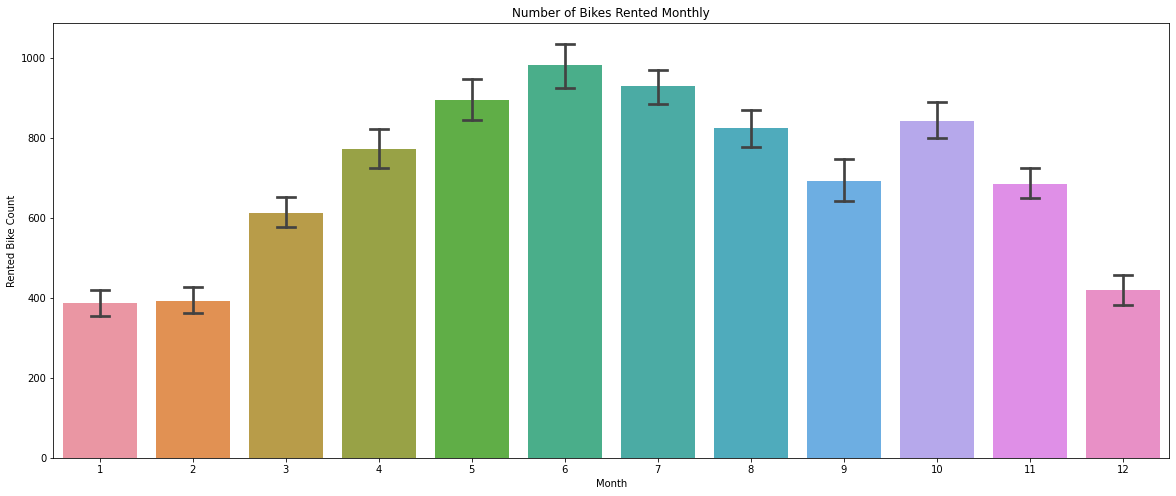

In [256]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df, x='Month', y='Rented Bike Count', ax=ax, capsize=.2)
ax.set(title='Number of Bikes Rented Monthly')

**Observation**

From the above Bar chart it can be clearly stated that the numbers of bike rented were comparitively higher from May to October with June been the month where most numbers of bikes rented.

# **Count of Rented Bikes according to Hour**

[Text(0.5, 1.0, 'Count of Rented Bikes according to Hour')]

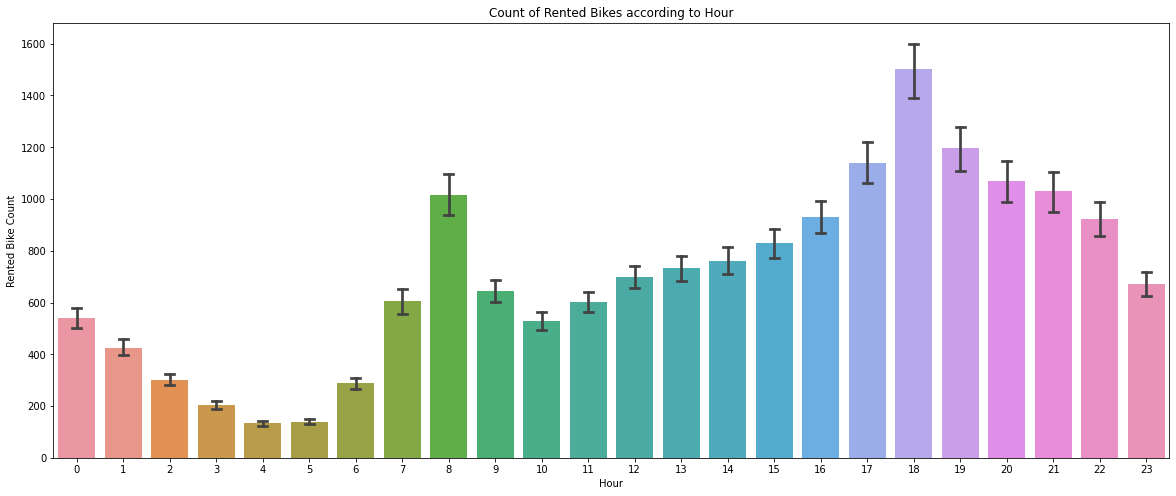

In [257]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df, x='Hour', y='Rented Bike Count', ax=ax, capsize=.2)
ax.set(title='Count of Rented Bikes according to Hour')

**Observation**

From the above plot we can say that the use of rented bikes are high from 7am-9am and 5pm-8pm.

# **Bike Rented during Weekdays and Weekend**

[Text(0.5, 1.0, 'Bike Rented during Weekdays and Weekend')]

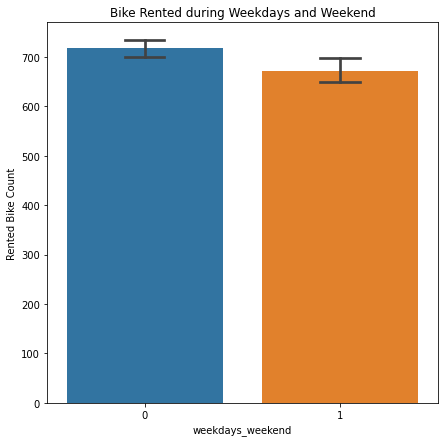

In [258]:
fig,ax=plt.subplots(figsize=(7,7))
sns.barplot(data=df, x='weekdays_weekend', y='Rented Bike Count', ax=ax, capsize=.2)
ax.set(title='Bike Rented during Weekdays and Weekend')

# **Count of Hourly Rented Bikes on Weekdays and Weekend**

[Text(0.5, 1.0, 'Count of Hourly Rented Bikes on Weekdays and Weekend ')]

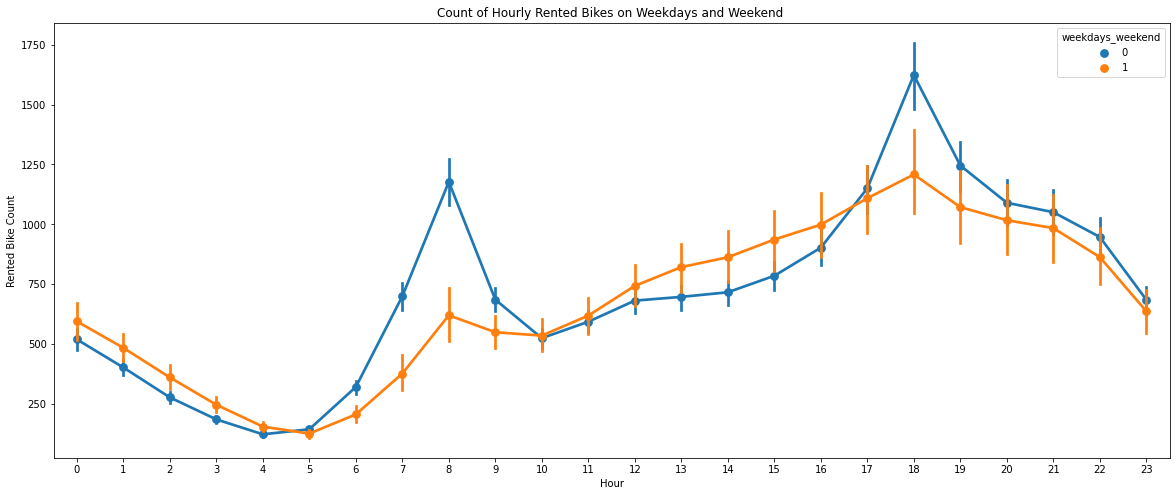

In [259]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df, x='Hour', y='Rented Bike Count', hue='weekdays_weekend')
ax.set(title='Count of Hourly Rented Bikes on Weekdays and Weekend ')

**Observation**

On the above graph,

*   Blue Line    = Weekdays
*   Orange Line  = Weekend

From the above point plot, we can say that the demand of the bikes is higher on weekdays than on the weekends.

Peak Time are between 7am-9am and 5pm-9pm.

# **Count of Rented Bikes according to Functioning Day**

[Text(0.5, 1.0, 'Count of Rented Bikes according to Functioning Day')]

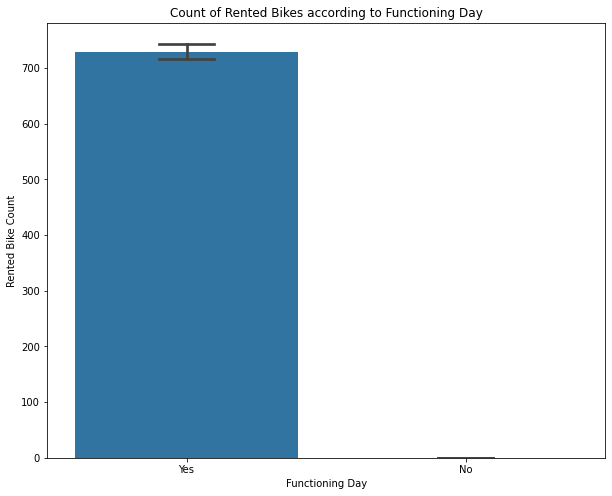

In [260]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df, x='Functioning Day', y='Rented Bike Count', ax=ax, capsize=.2)
ax.set(title='Count of Rented Bikes according to Functioning Day')

**Observation**

From the above bar plot and point plot which shows the use of rented bikes on functioning day and non functioning Day, we can say that, Peoples dont use reneted bikes on non functioning days.

[Text(0.5, 1.0, 'Count of Rented Bikes according to Functioning Day')]

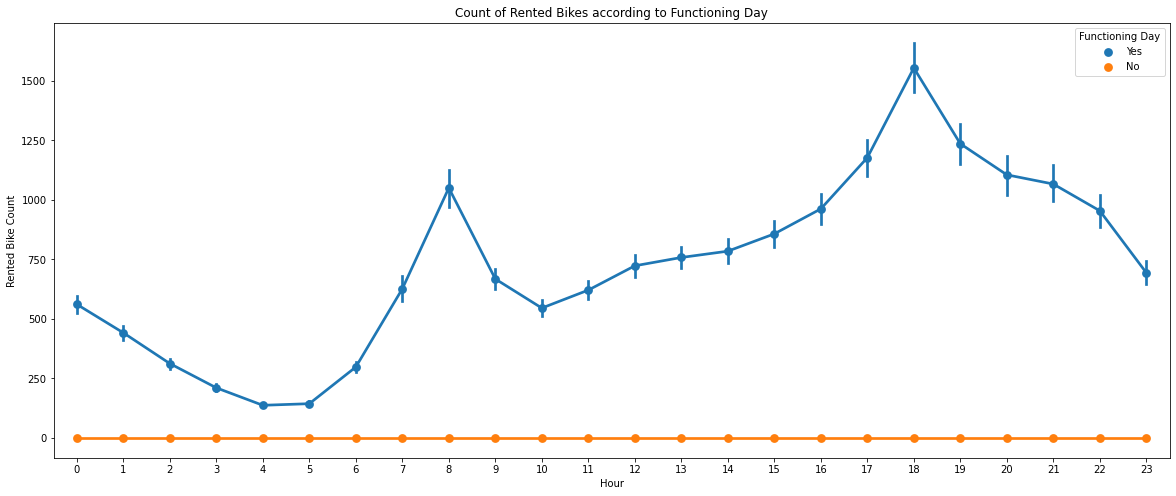

In [261]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df, x='Hour', y='Rented Bike Count', hue='Functioning Day')
ax.set(title='Count of Rented Bikes according to Functioning Day')

**Observation**

We can also say from the above that count of rented bikes are high between 7am-9am and 5pm-7pm

# **Season Wise Analysis**

[Text(0.5, 1.0, 'Season Wise Demand of Rented Bikes')]

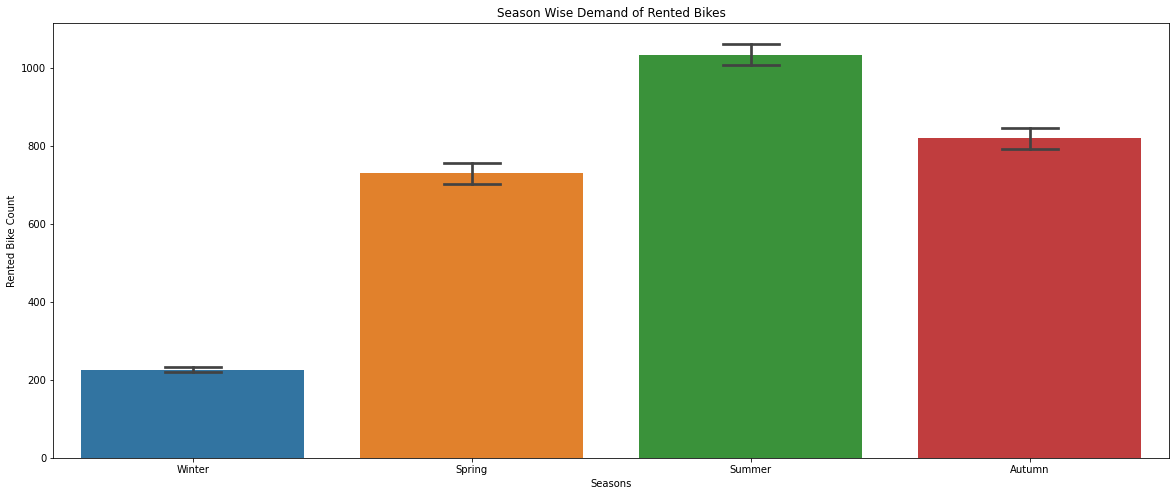

In [262]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df, x='Seasons', y='Rented Bike Count', ax=ax, capsize=.2)
ax.set(title='Season Wise Demand of Rented Bikes')

**Observation**

Demand for bike is most During Summer season, whilst this demand exponentially decreases in Winter.

This decline in demand during winter season mmaybe because of bad weather condition, heavy snowfall etc.

[Text(0.5, 1.0, 'Count of Rented Bikes according to Seasons')]

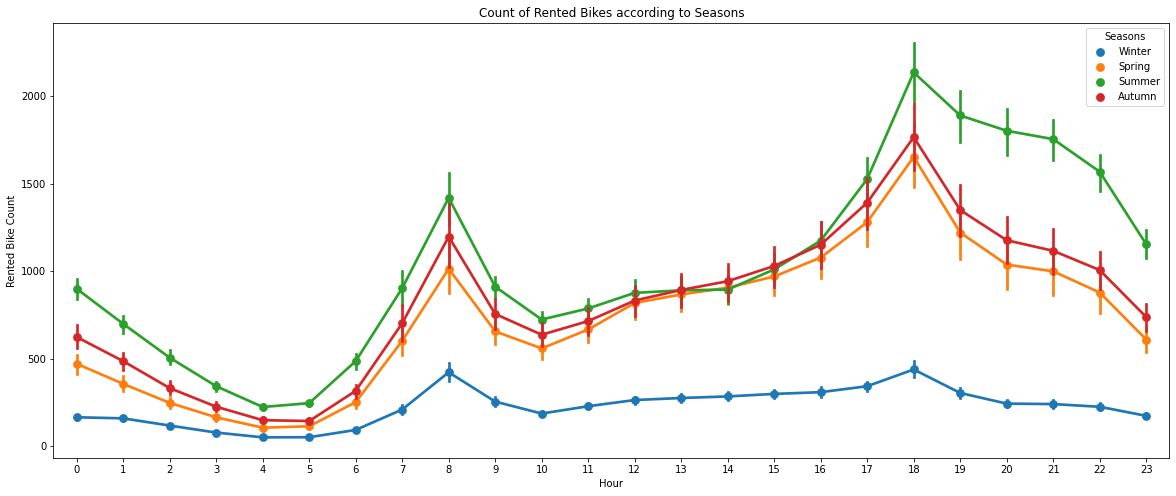

In [263]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df, x='Hour', y='Rented Bike Count', hue='Seasons')
ax.set(title='Count of Rented Bikes according to Seasons')

**Observation**

7-9 during day and 5-7 in the evening are the hours where Bike demand is at the peak, this trend is common for almost all seasons.

# **Demand During Normal Days and Holidays**

[Text(0.5, 1.0, 'Demand of Rented Bikes During Normal Days and Holidays')]

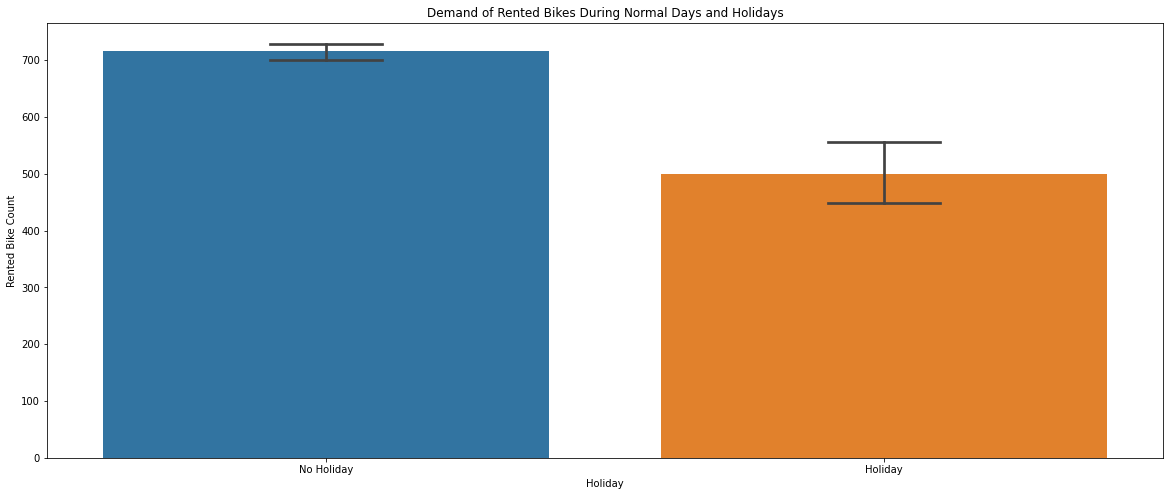

In [264]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df, x='Holiday', y='Rented Bike Count', ax=ax, capsize=.2)
ax.set(title='Demand of Rented Bikes During Normal Days and Holidays')

**Observation**

From the above plot, we can say that the demand of the bikes is higher on No Holidays than on the Holidays.

# **Numerical Data Analysis**

In [265]:
#Creating a attribute for analysis of numeric variables
numerical_columns = list(df.select_dtypes(['int64','float64']).columns)
numerical_features = pd.Index(numerical_columns)
numerical_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Month',
       'weekdays_weekend'],
      dtype='object')

<function matplotlib.pyplot.show(*args, **kw)>

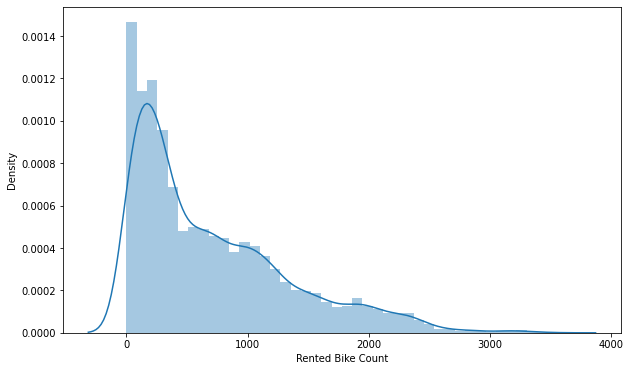

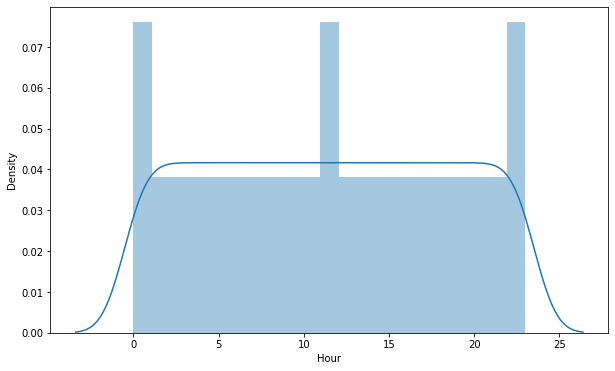

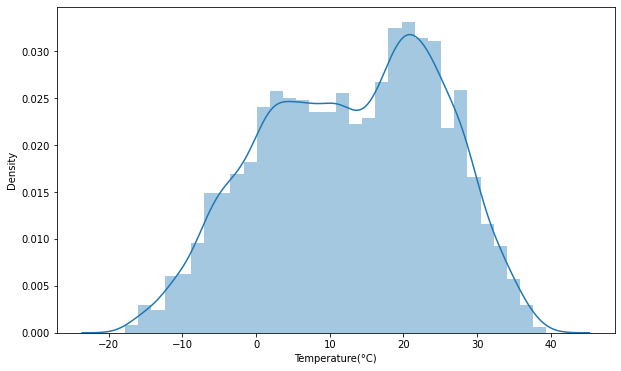

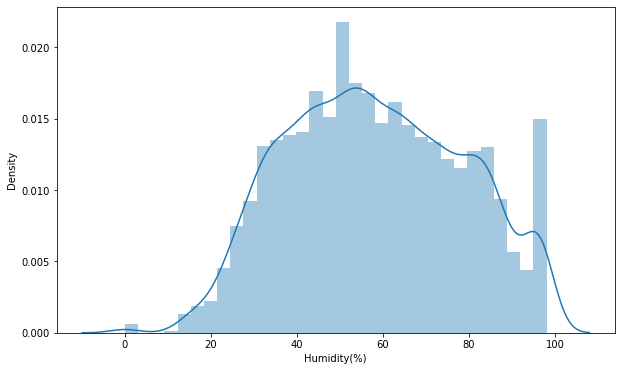

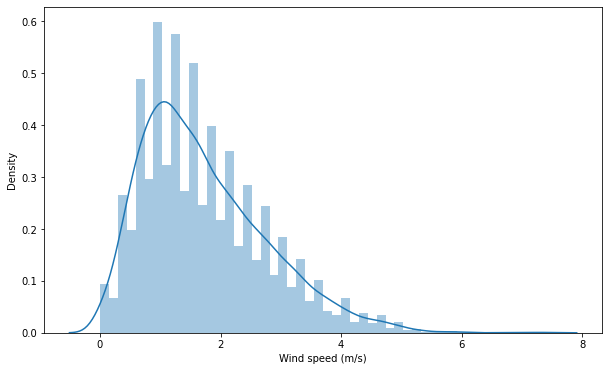

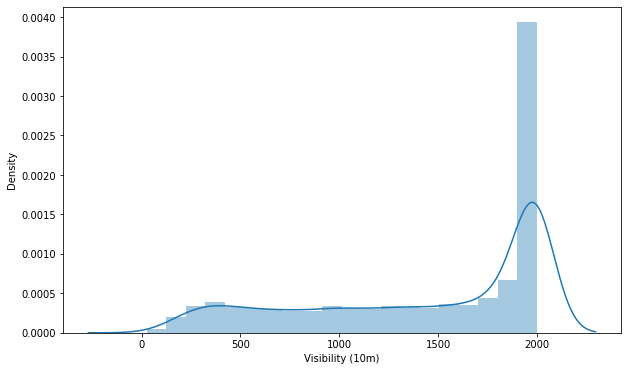

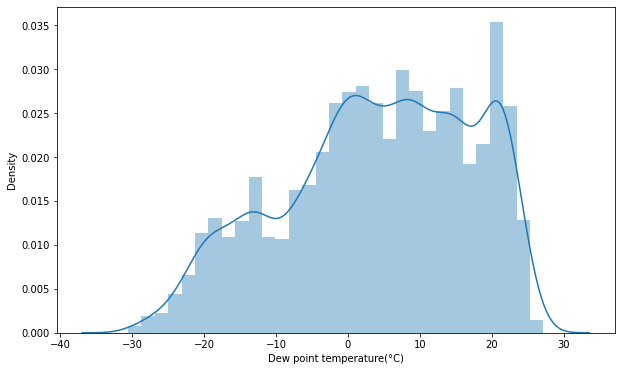

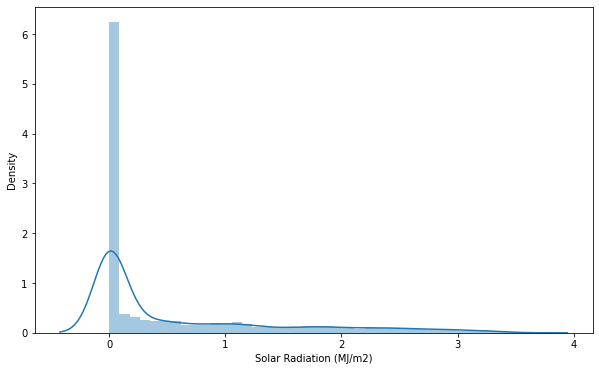

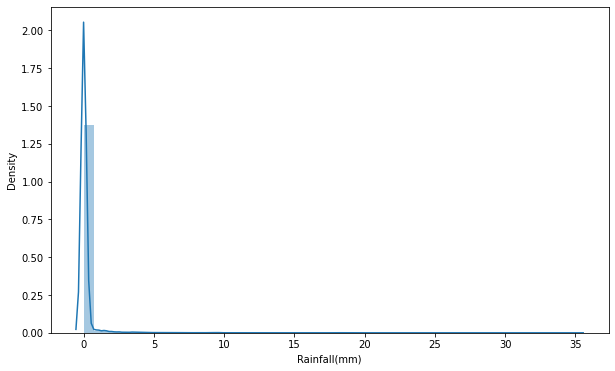

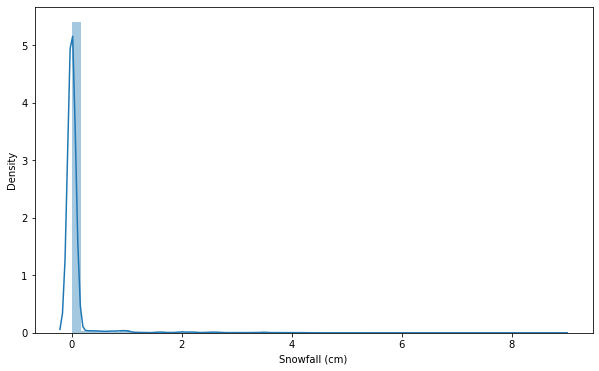

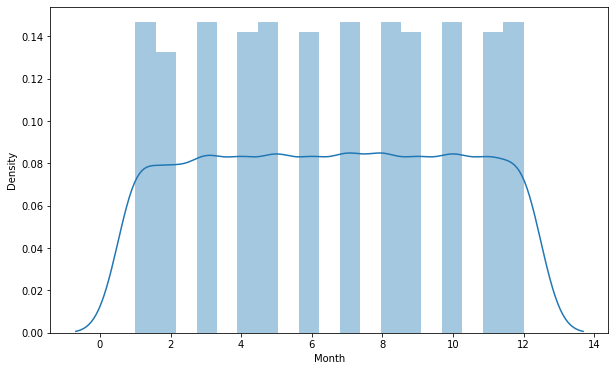

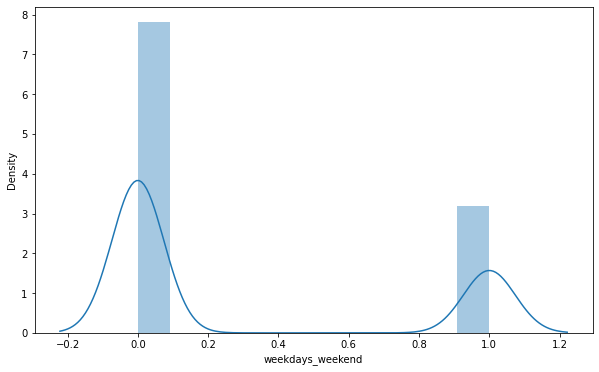

In [266]:
#Analyzing the distribution of all numeric attributes through distplots
for col in numerical_features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=df[col])
  plt.xlabel(col)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

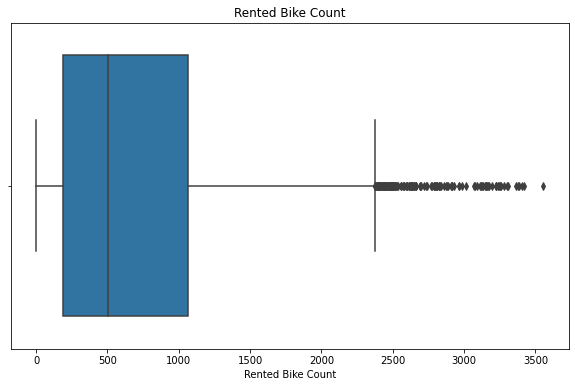

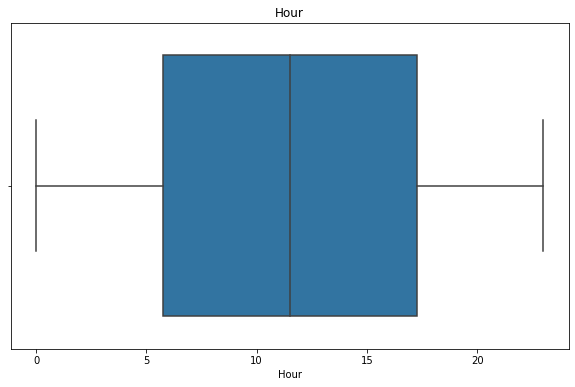

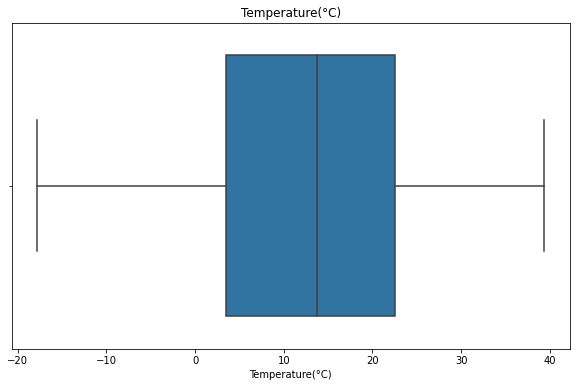

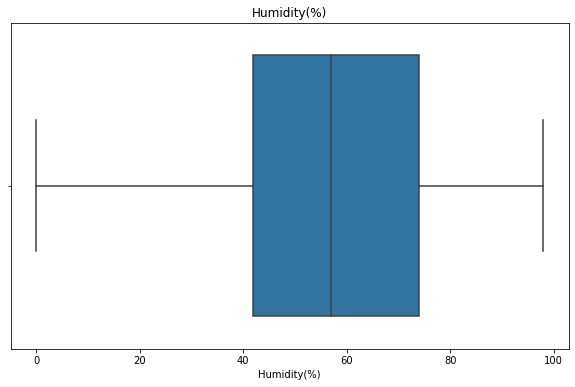

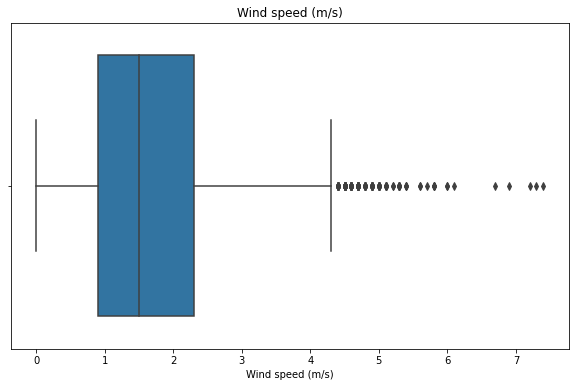

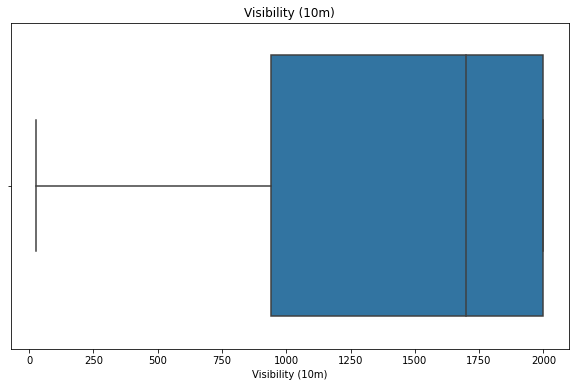

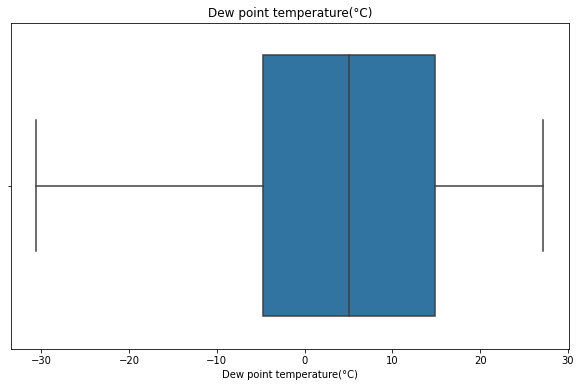

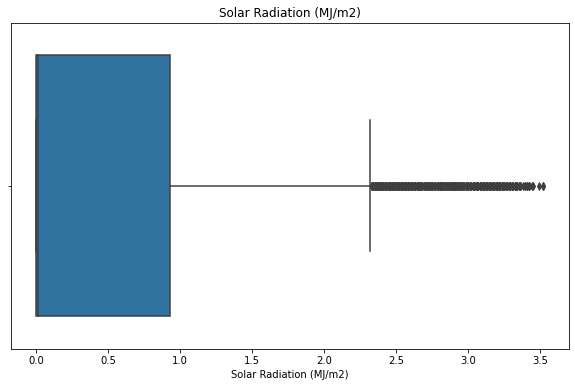

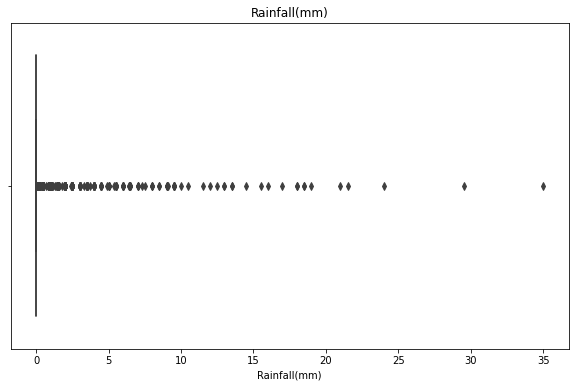

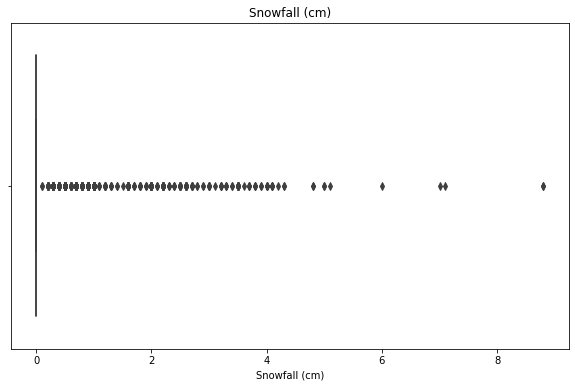

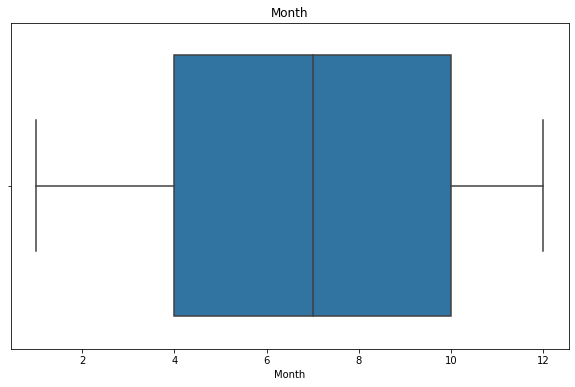

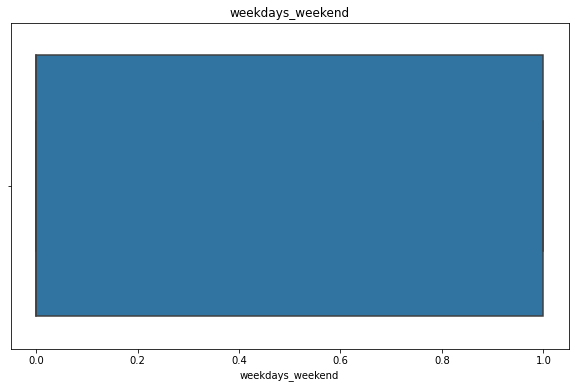

In [267]:
#Printing box plots of numeric attributes to check outliers
for col in numerical_features:
  plt.figure(figsize=(10,6))
  ax=fig.gca()
  sns.boxplot(x=df[col])
  plt.title(col)
plt.show

# **Analysis of Numerical variables with respect to the dependent variable**

**Analyzing the relationship between "Rented Bike Count" and "Temperature"**

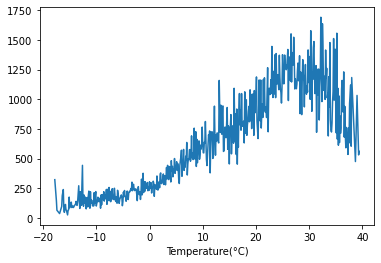

In [268]:
df.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot()

**Observation**

From the above plot, we can say that people like to ride bikes when the temperature is above 20 and are less probable to ride bikes in lower temperatures.

**Analyzing the relationship between "Rented Bike Count" and "Dew point temperature(°C)"**

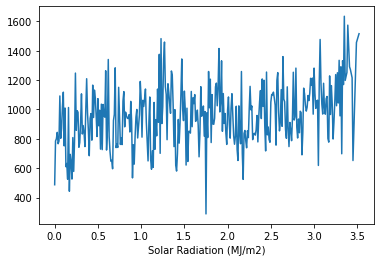

In [269]:
df.groupby('Solar Radiation (MJ/m2)').mean()['Rented Bike Count'].plot()

**Observation**

From the above plot, we can say that the amount of rented bikes is huge when there is solar radiation, and the average count of bikes rented is around 1000.

**Analyzing the relationship between "Rented Bike Count" and "Snowfall (cm)"**

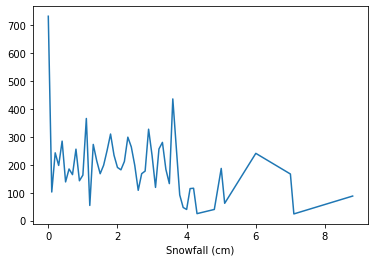

In [270]:
df.groupby('Snowfall (cm)').mean()['Rented Bike Count'].plot()

**Observation**

From the plot, we can see that the number of rented bikes is very low and when we have a snowfall of more than 4 cm, the bike rent count is much lower.

**Analyzing the relationship between "Rented Bike Count" and "Rainfall(mm)"**

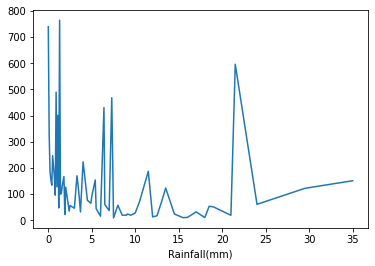

In [271]:
df.groupby('Rainfall(mm)').mean()['Rented Bike Count'].plot()

**Observation**

From the above plot, we can say that even with rainfalls, demand for rental bikes is not decreasing, we can see from above that, even having a rainfall of 20 mm, there is a big peak of rented bikes.

**Analyzing the relationship between "Rented Bike Count" and "Wind speed (m/s)"**

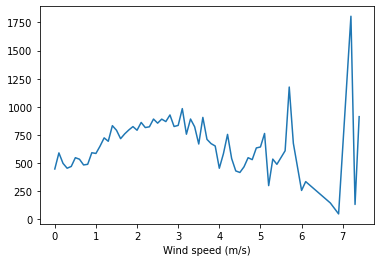

In [272]:
df.groupby('Wind speed (m/s)').mean()['Rented Bike Count'].plot()

**Observation**

From the above plot, we can say that the demand for rented bikes is uniformly distributed despite of wind speed.

We can also see that, when the speed of wind is 7 m/s, the demand for bike rentals increased rapidly, from which we can say that peoples love to ride bikes when it's a little windy.

# **Normalization**

# **Checking the distribution of the target variable- "Rented Bike Count"**

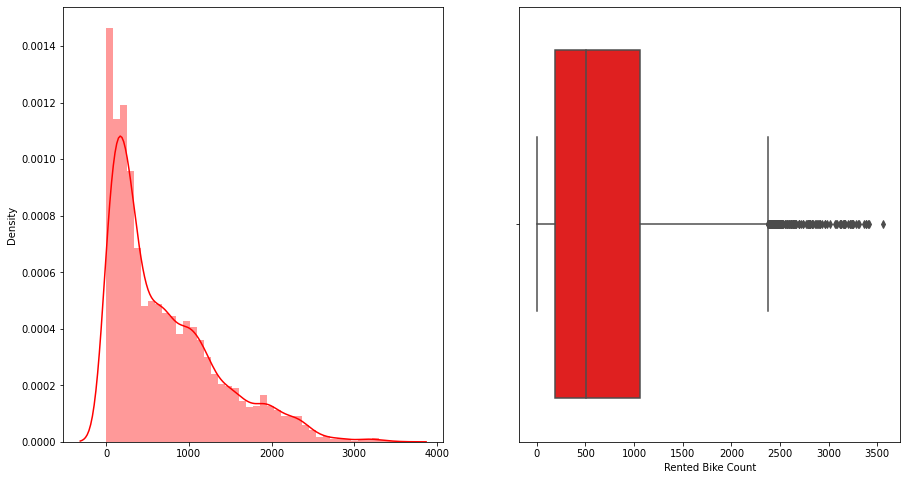

In [273]:
#Checking the distribution and outliers
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x=df['Rented Bike Count'],color='red',ax=axes[0])

# Boxplot for outliers
sns.boxplot(x=df['Rented Bike Count'],color='red',ax=axes[1])

**Observation**

The above graph shows that Rented Bike Count is slightly right-skewed.

Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal, so we should perform some operation to make it normal.

From the boxplot, we can see that we have outliers in the Rented Bike Count column.

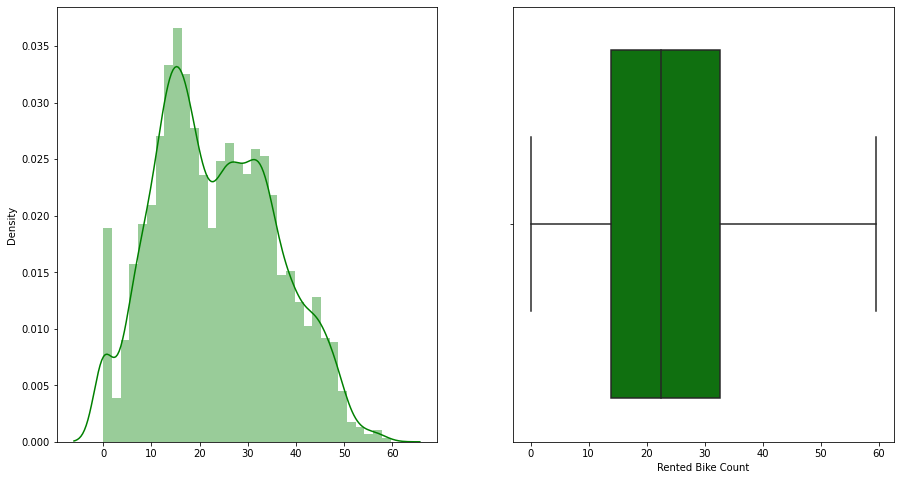

In [274]:
# Normalizing  our target variable by squre root method
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x=np.sqrt(df['Rented Bike Count']),color='g',ax=axes[0])
sns.boxplot(x=np.sqrt(df['Rented Bike Count']),color='g',ax=axes[1])

**Observation**

Thus we normalized our dependent variable by the square root method and also in the boxplot we can see that there are no outliers.

# **Checking the distribution of independent variables**

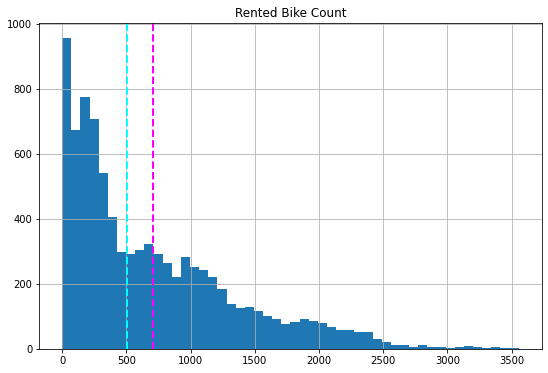

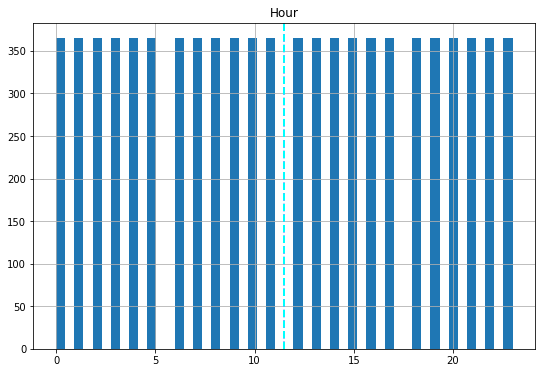

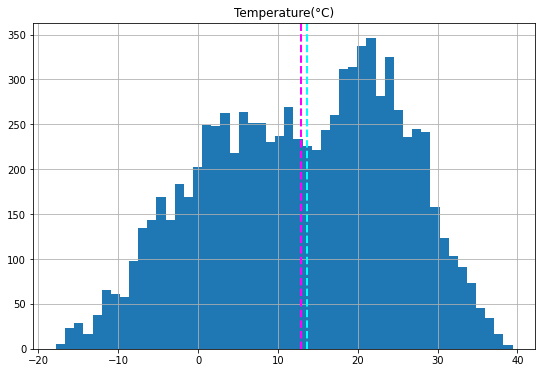

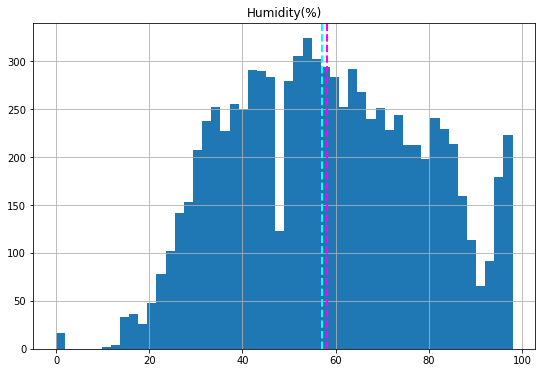

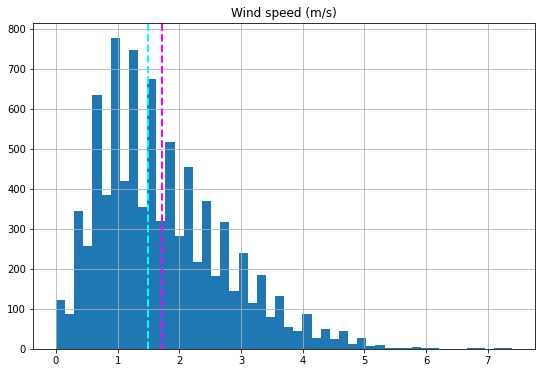

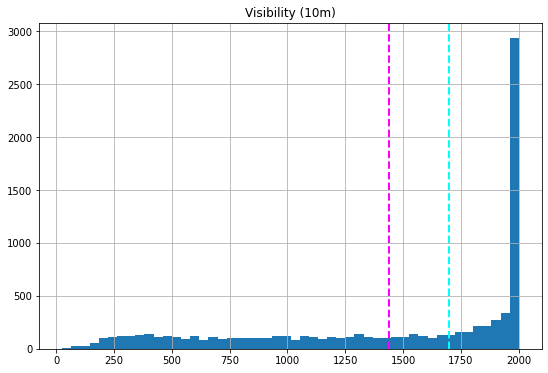

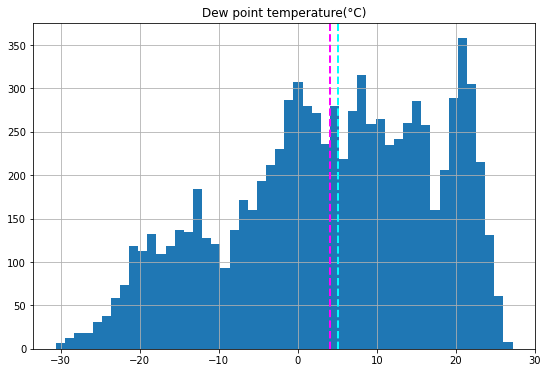

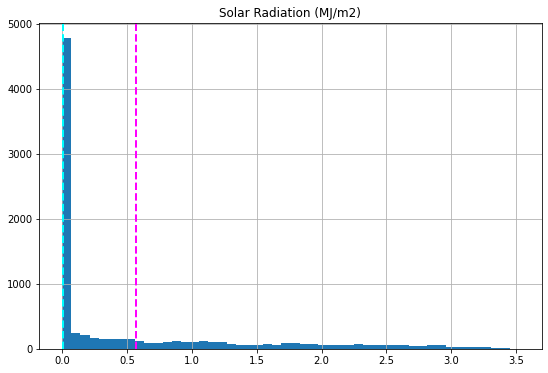

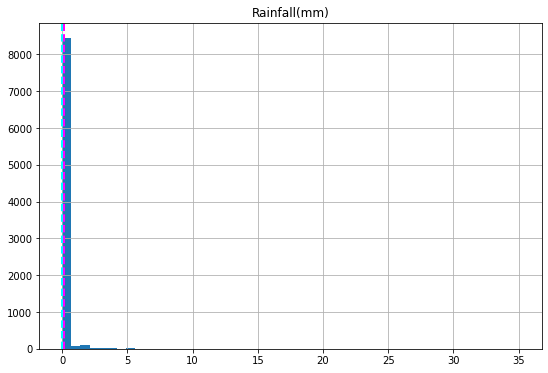

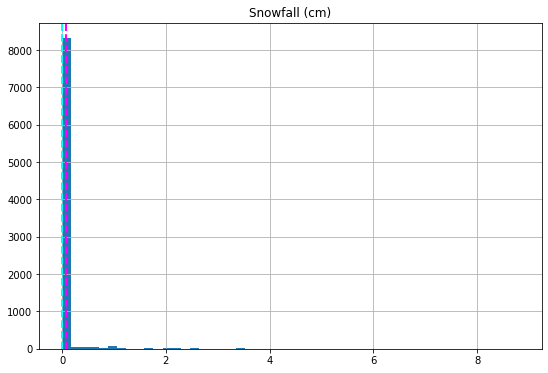

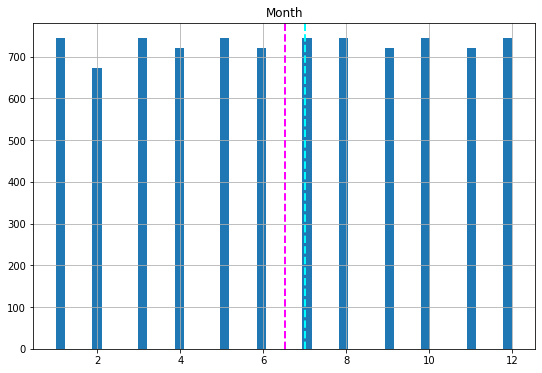

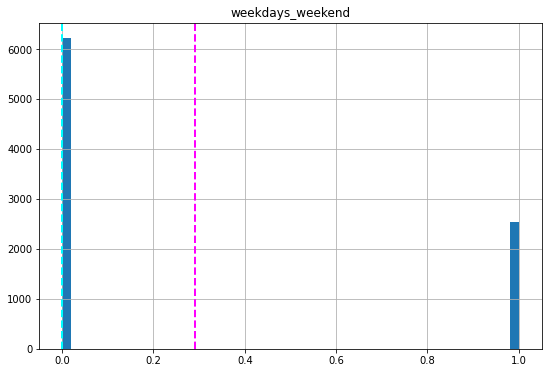

In [275]:
# Plotting a histogram graph to check where the mean and median are lying in the distribution and how the data points in variables are distributed.
for col in numerical_columns:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

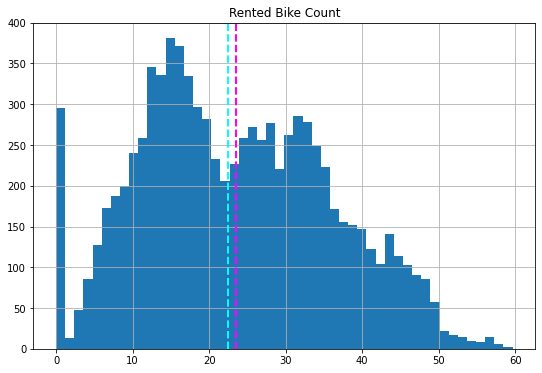

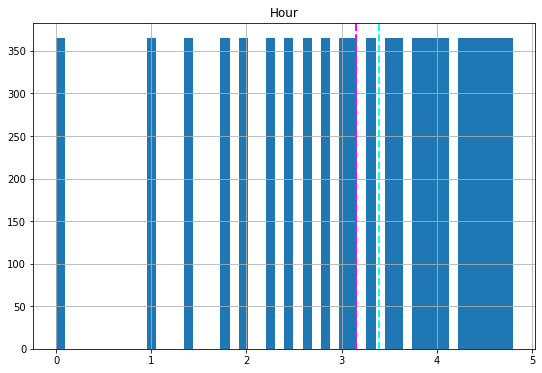

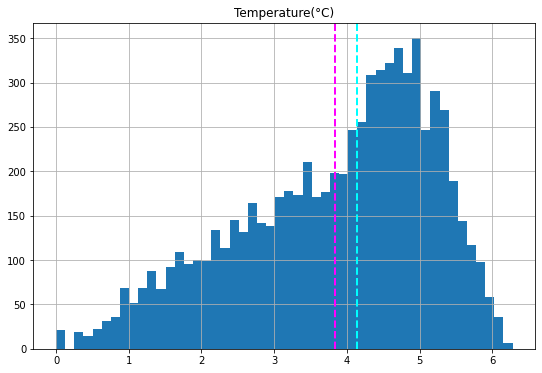

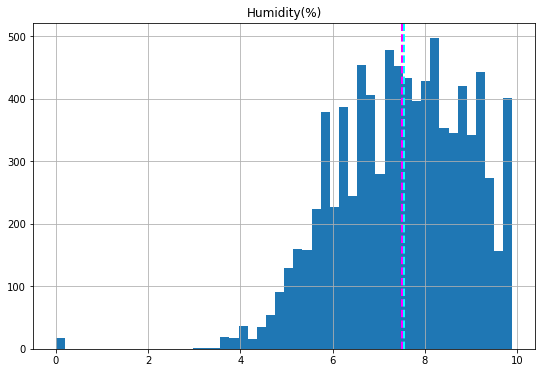

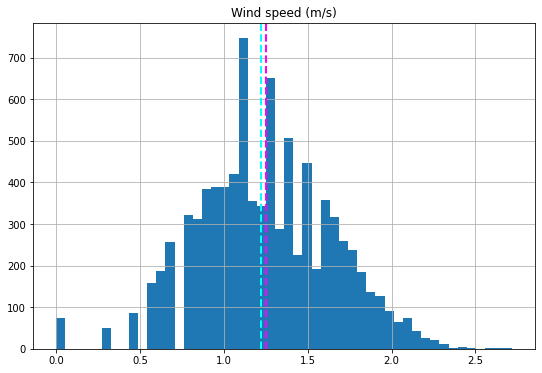

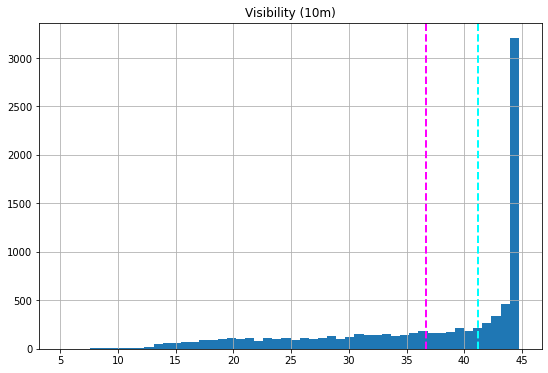

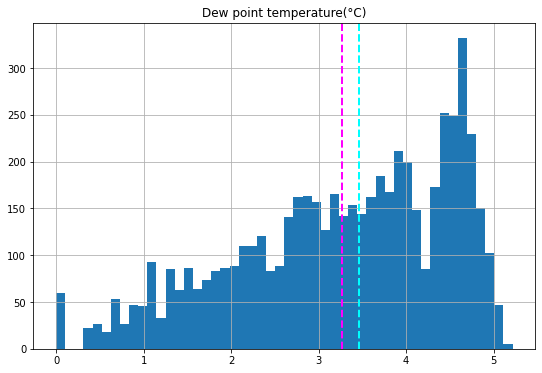

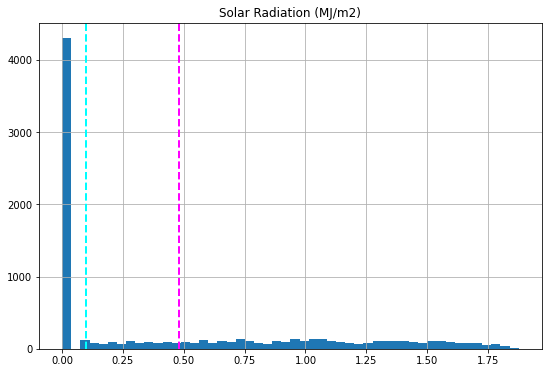

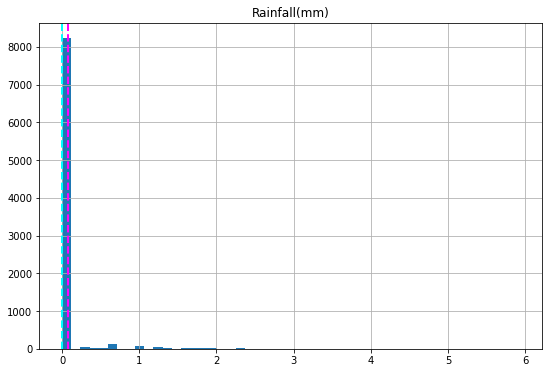

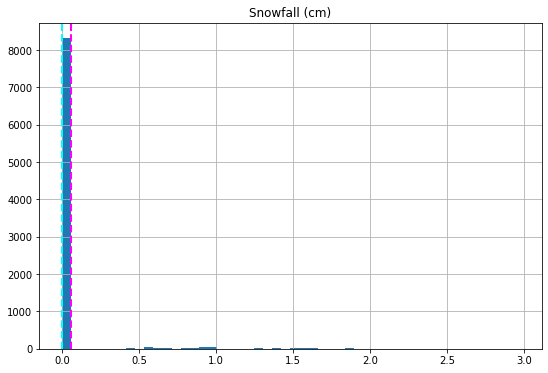

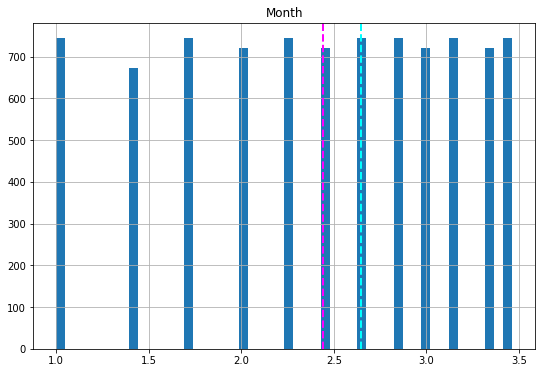

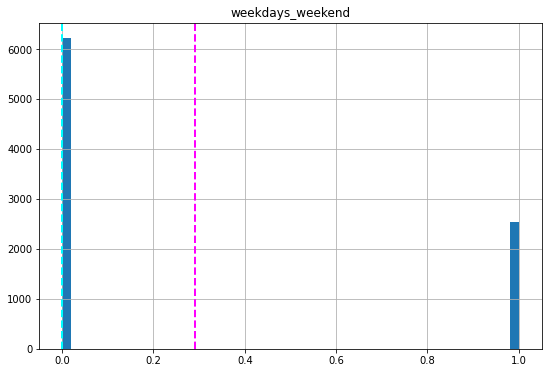

In [276]:
# Normalizing The variables using the square root method.
for col in numerical_columns:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

# **Regression**

**Checking the relationship between the dependent variable-"Rented Bike Count' and independent variables through Regression plot**

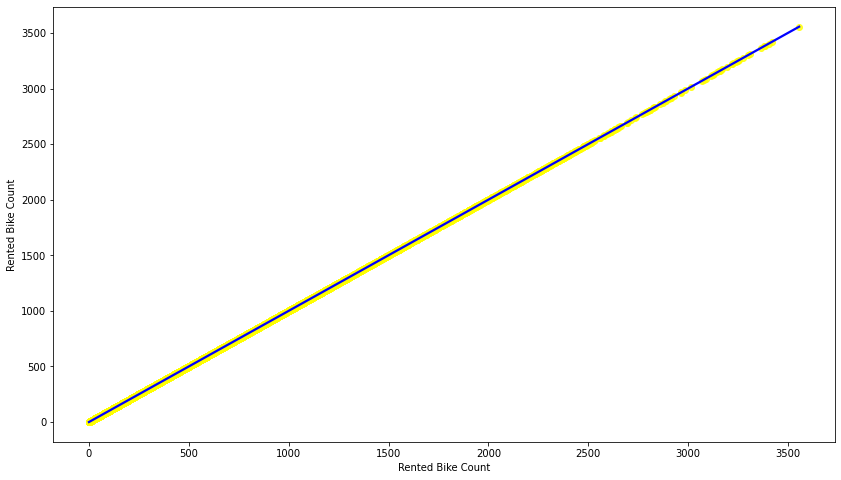

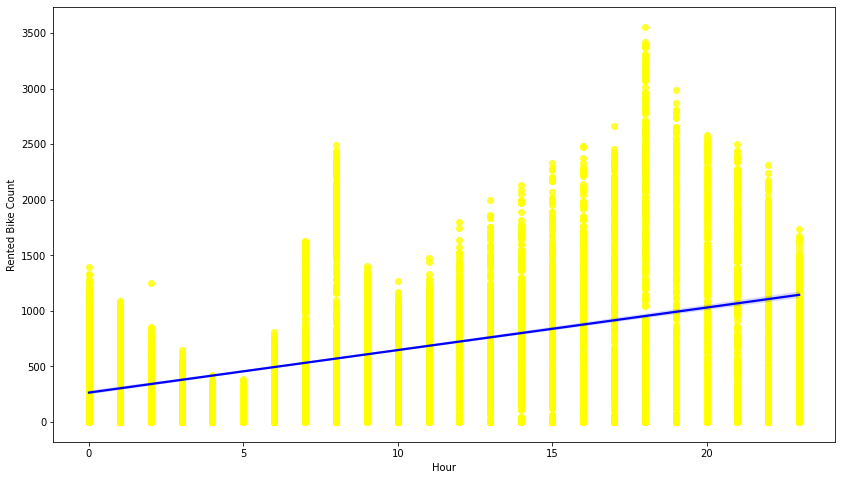

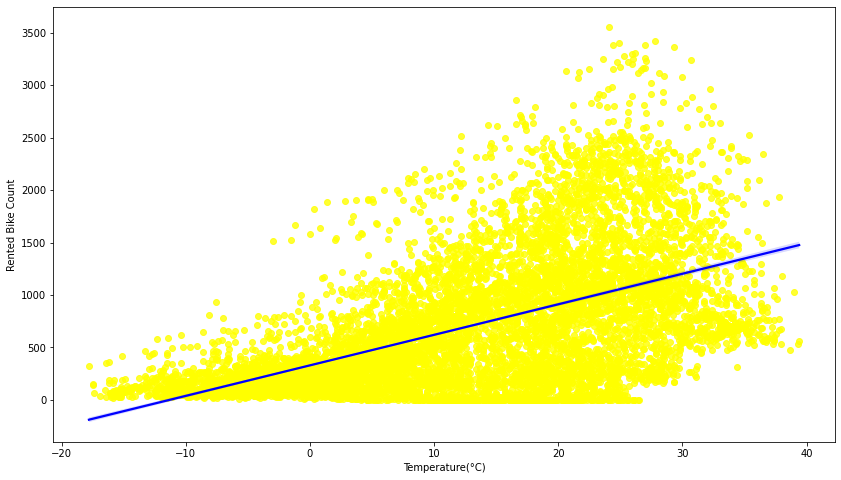

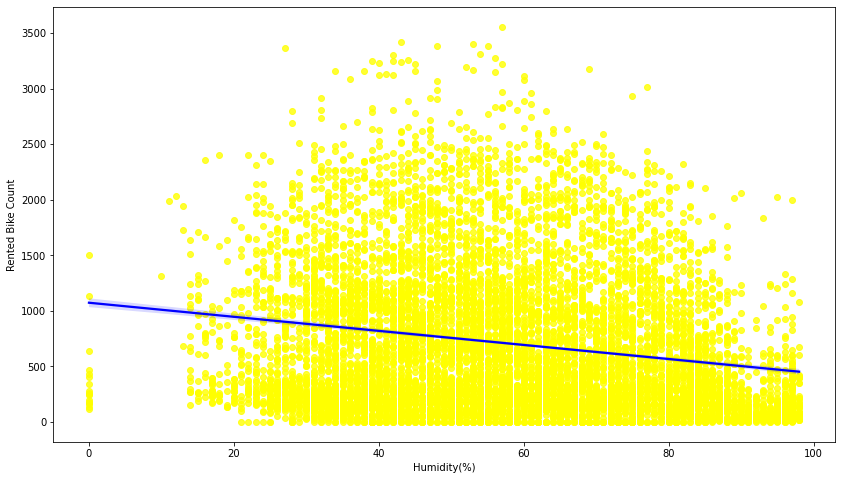

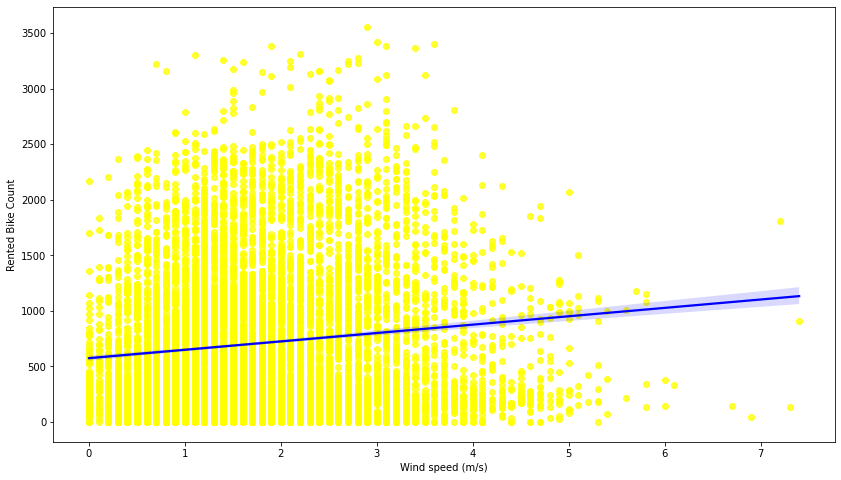

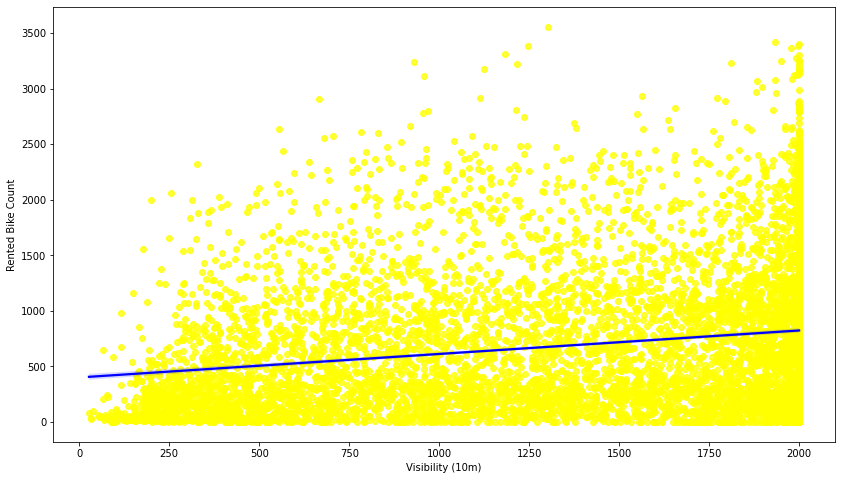

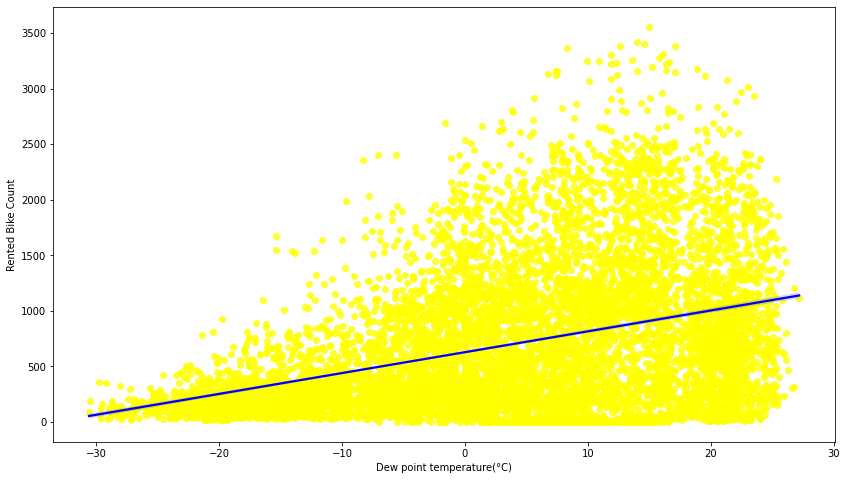

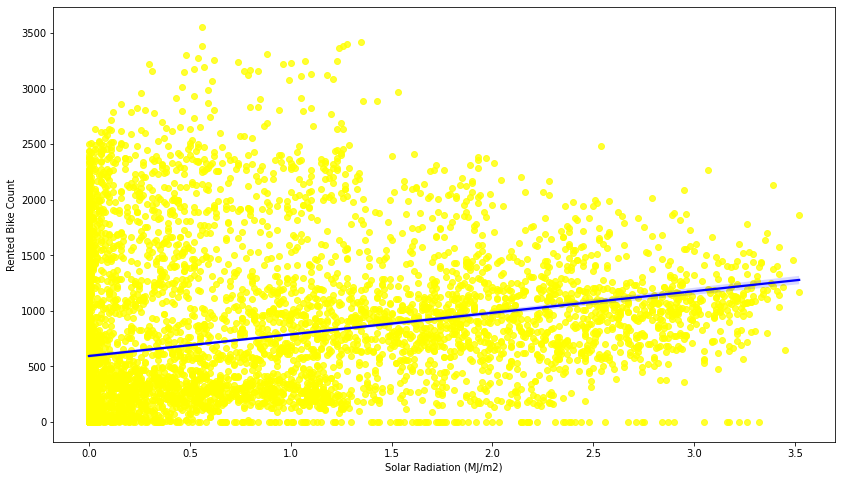

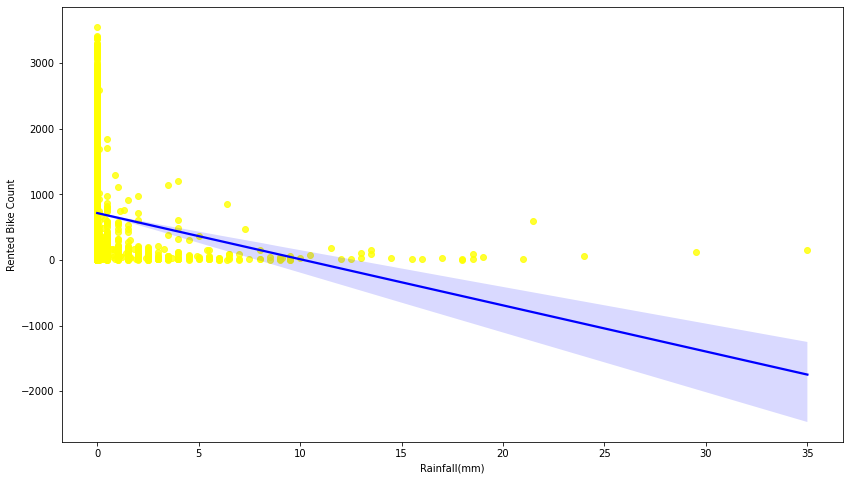

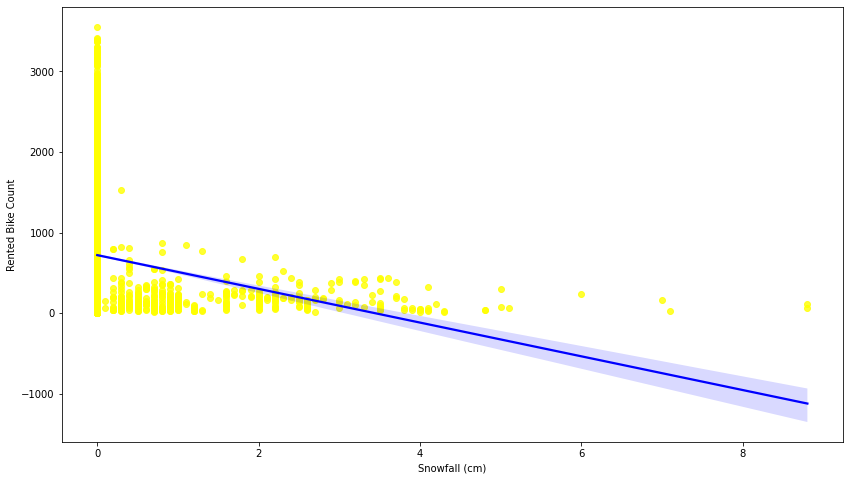

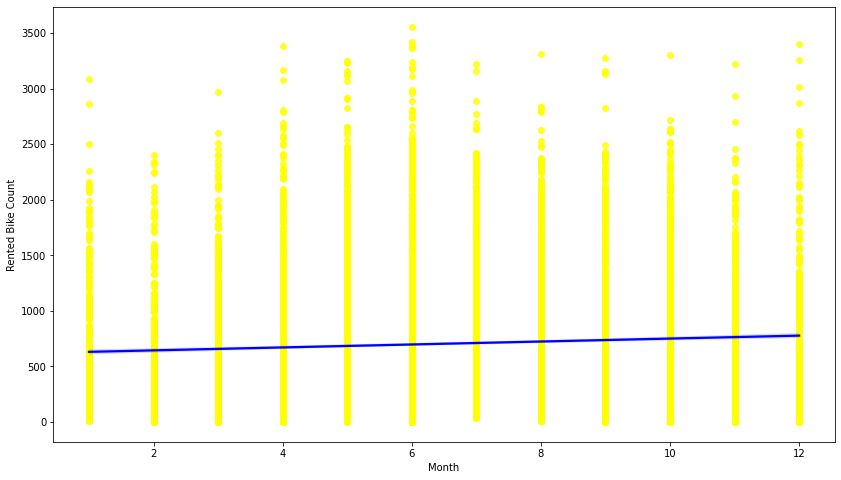

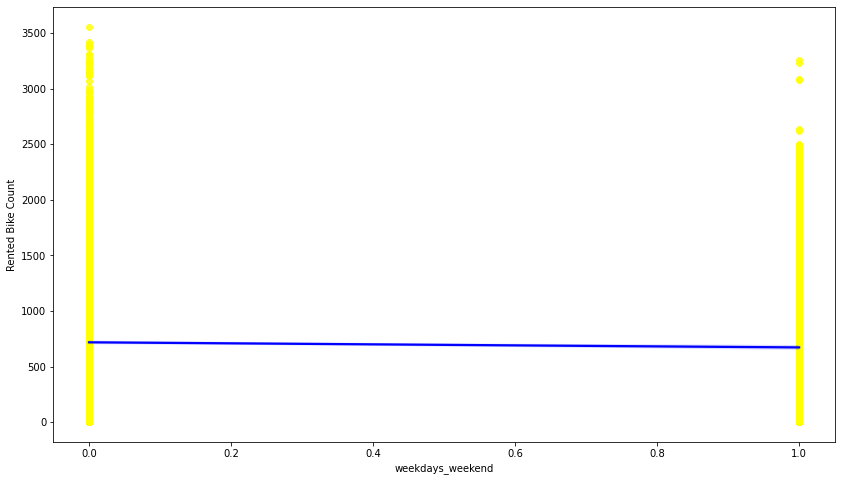

In [277]:
#Printing the regression plot for all the numerical features
for col in numerical_columns:
  plt.figure(figsize=(14,8))
  ax=fig.gca()
  sns.regplot(x=df[col],y=df['Rented Bike Count'],scatter_kws={"color": 'yellow'}, line_kws={"color": "blue"})

**Observation**

It can be seen that the 'Temperature', 'Dew point temperature' 'Solar Radiation' 'Wind speed', and 'Visibility' are positively related to the target variable and hence this means that The rented Bike numbers will increase with the increase in these features.

Whilst, features like Rainfall, Snowfall, and Humidity were negatively related to the target variable. This means that these features are inversely proportional to the target variable and the number of rented bikes will decrease with an increase in these features.

# **Checking Correlation between dependent and independent variable**

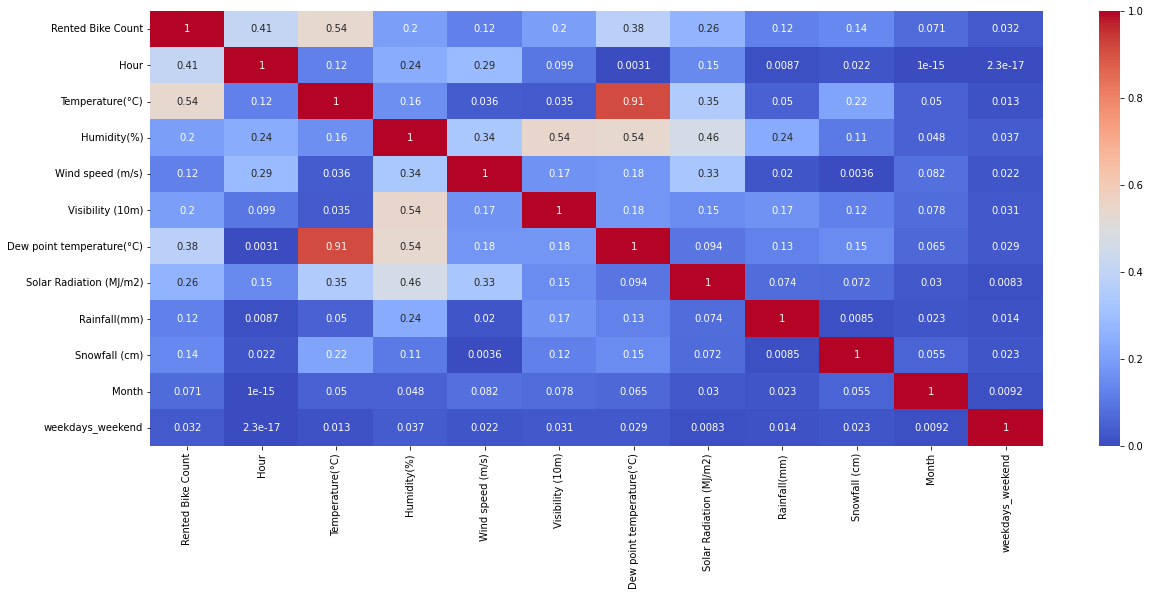

In [278]:
#Plotting the Correlation matrix
plt.figure(figsize=(20,8))
corr=df.corr()
sns.heatmap(data=abs(corr),annot=True,cmap='coolwarm')

**Observation**

From the above heatmap we can say that,

"Temperature" and "Dew point Temperature" are highly correlated. As per our regression assumption, there should not be colinearity between independent variables. So we can drop one of them.

As the correlation between temperature and our dependent variable "Bike Rented Count" is high, we will Keep the Temperature column and drop the "Dew Point Temperature" column.

# **Removing Multicollinearity**

In [279]:
# Dropping dew point temperature as Temperature and Dew point temperature are corelated with each other.
df.drop('Dew point temperature(°C)',inplace=True,axis=1)

In [280]:
#Checking for Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [281]:
#Checking the VIF
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,3.961874
1,Temperature(°C),3.236809
2,Humidity(%),6.114153
3,Wind speed (m/s),4.616621
4,Visibility (10m),5.404128
5,Solar Radiation (MJ/m2),2.272068
6,Rainfall(mm),1.081252
7,Snowfall (cm),1.125304
8,Month,4.580307
9,weekdays_weekend,1.399708


**Observation**

VIF of Humidity and Visibility is greater than 5 so we will remove them.

In [282]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Humidity(%)','Visibility (10m)']]])

,variables,VIF
0,Hour,3.755736
1,Temperature(°C),2.492225
2,Wind speed (m/s),3.748534
3,Solar Radiation (MJ/m2),1.893823
4,Rainfall(mm),1.030569
5,Snowfall (cm),1.077566
6,Month,3.049391
7,weekdays_weekend,1.350943


**Observation**

Now we have VIF values in the range of 1 to 5. So we will drop 'Humidity','Visibility' attributes from our dataset.

In [283]:
#Dropping humidity and visibility attributes.
df.drop(['Humidity(%)','Visibility (10m)'],inplace=True,axis=1)

# **Creating Dummy Variables**

A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables.

In [284]:
# Checking categoiries in season attributes.
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [285]:
# Createing dummy variables for seasons
df=pd.get_dummies(df,columns=['Seasons'],prefix='Seasons',drop_first=True)

In [286]:
#Checking categoiries in holiday attributes.
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [287]:
# Labeling for holiday=1 and no holiday=0
df['Holiday']=df['Holiday'].map({'No Holiday':0, 'Holiday':1})

In [288]:
#Checking categoiries in Functioning Day attributes.
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [289]:
# Labeling for Yes=1 and No=0
df['Functioning Day']=df['Functioning Day'].map({'Yes':1, 'No':0})

In [290]:
# Checking labled columns
df.head(10)

,Rented Bike Count,Hour,Temperature(°C),Wind speed (m/s),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Month,weekdays_weekend,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,2.2,0.00,0.0,0.0,0,1,1,0,0,0,1
1,204,1,-5.5,0.8,0.00,0.0,0.0,0,1,1,0,0,0,1
2,173,2,-6.0,1.0,0.00,0.0,0.0,0,1,1,0,0,0,1
3,107,3,-6.2,0.9,0.00,0.0,0.0,0,1,1,0,0,0,1
4,78,4,-6.0,2.3,0.00,0.0,0.0,0,1,1,0,0,0,1
5,100,5,-6.4,1.5,0.00,0.0,0.0,0,1,1,0,0,0,1
6,181,6,-6.6,1.3,0.00,0.0,0.0,0,1,1,0,0,0,1
7,460,7,-7.4,0.9,0.00,0.0,0.0,0,1,1,0,0,0,1
8,930,8,-7.6,1.1,0.01,0.0,0.0,0,1,1,0,0,0,1
9,490,9,-6.5,0.5,0.23,0.0,0.0,0,1,1,0,0,0,1


In [291]:
#Checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Wind speed (m/s)         8760 non-null   float64
 4   Solar Radiation (MJ/m2)  8760 non-null   float64
 5   Rainfall(mm)             8760 non-null   float64
 6   Snowfall (cm)            8760 non-null   float64
 7   Holiday                  8760 non-null   int64  
 8   Functioning Day          8760 non-null   int64  
 9   Month                    8760 non-null   int64  
 10  weekdays_weekend         8760 non-null   int64  
 11  Seasons_Spring           8760 non-null   uint8  
 12  Seasons_Summer           8760 non-null   uint8  
 13  Seasons_Winter           8760 non-null   uint8  
dtypes: float64(5), int64(6),

# **Linear Regression**

In [292]:
# Defining X-variable(Independent Variables) and Y-Variable(Dependent Variable)
X=df.drop('Rented Bike Count',axis=1)
y=np.sqrt(df['Rented Bike Count'])

In [293]:
#Split data into train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(f'Shape of X training dataset is {X_train.shape}')
print(f'Shape of X training dataset is {X_test.shape}')

Shape of X training dataset is (6132, 13)
Shape of X training dataset is (2628, 13)


In [294]:
#Transforming data
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

Here, even if we don't apply to scale, we will still get almost similar results.

It's a good practice to apply to scale to the linear regression models.

In [295]:
# Checking shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6132, 13)
(6132,)
(2628, 13)
(2628,)


In [296]:
# Taking instance
line_reg=LinearRegression()

# Fitting the model and training
line_reg.fit(X_train,y_train)

LinearRegression()

In [297]:
# Checking coefficients
line_reg.coef_

array([ 13.03412526,  24.3956317 ,   3.35825273,   3.43510298,
       -71.13971093, -10.4763411 ,  -3.00551186,  28.47981875,
         1.05521935,  -0.58930031,  -2.93262797,  -3.58223659,
        -6.45886182])

In [298]:
#Dataframe for X columns and coefficient
pd.DataFrame(line_reg.coef_,X.columns, columns=['Coefficient'])

,Coefficient
Hour,13.034125
Temperature(°C),24.395632
Wind speed (m/s),3.358253
Solar Radiation (MJ/m2),3.435103
Rainfall(mm),-71.139711
Snowfall (cm),-10.476341
Holiday,-3.005512
Functioning Day,28.479819
Month,1.055219
weekdays_weekend,-0.589300


In [299]:
# Checking intercept
line_reg.intercept_

-21.47705344024816

In [300]:
# Checking score
line_reg.score(X_train,y_train)

0.6123528085603556

In [301]:
# y predictions on train data
y_pred_train=line_reg.predict(X_train)

# y predictions on test data
y_pred_test=line_reg.predict(X_test)

## **Evaluation on Train Data**

In [302]:
#Calculating Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculating  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculating Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculating R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

#Calculating Adjusted R2
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

The Mean Absolute Error (MAE) is 5.8555397241788345.
The Mean Squred Error(MSE) is 60.29949292444555.
The Root Mean Squared Error(RMSE) is 7.765274813195316.
The R2 Score is 0.6123528085603556.
Adjusted R2 : 0.6104249533619182


In [303]:
# Saving train data set results in dataframe.
train_dict={'Model':"Linear Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4),
             'Adjusted R2':round((Adjusted_R2_lr ),2)
            }

In [304]:
# Creating training_result dataframe
training_results_df=pd.DataFrame(train_dict,index=[1])
training_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
1,Linear Regression,5.8555,60.2995,7.7653,0.6124,0.61


## **Evaluation on Test Data**

In [305]:
#Calculating Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred_test)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculating  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred_test)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculating Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculating R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

#Calculating Adjusted R2
Adjusted_R2_lr = (1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

 The Mean Absolute Error (MAE) is 5.834169822951748.
 The Mean Squred Error(MSE) is 58.624247223024895.
The Root Mean Squared Error(RMSE) is 7.656647257319936.
The R2 Score is 0.618326967365199.
Adjusted R2 : 0.6164288229794865


In [306]:
# Saving test result in dictionary.
test_dict={'Model':"Linear Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4),
             'Adjusted R2':round((Adjusted_R2_lr ),2)
           }

In [307]:
# Creating test_result dataframe
test_results_df=pd.DataFrame(test_dict,index=[1])
test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
1,Linear Regression,5.8342,58.6242,7.6566,0.6183,0.62


**Observation**

On testing data, the R2 score is 0.6183 which is almost close to the training data R2 score which is 0.612.

Hence we can say that our model performance is good and overfitting is not observed. We just need to improve our model performance.

Text(0.5, 0, 'y_predicted')

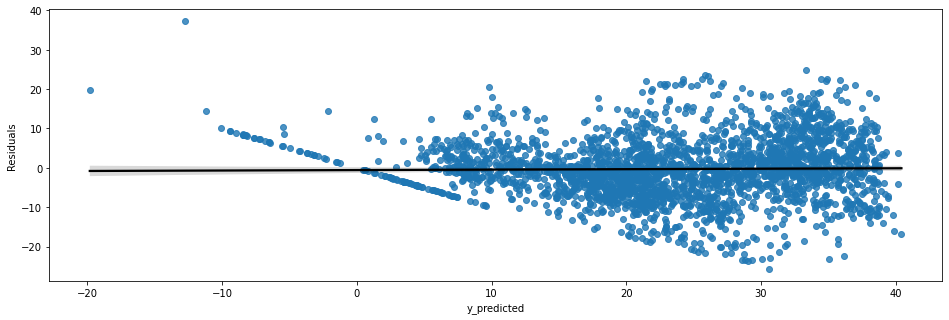

In [308]:
# Checking Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred_test,y=(y_test)-(y_pred_test),line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

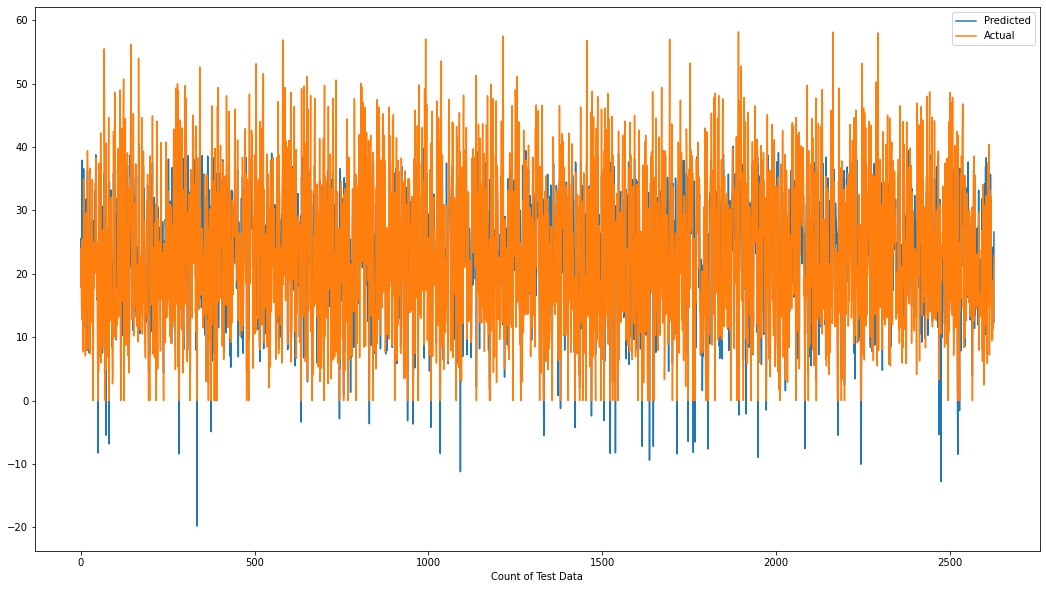

In [309]:
plt.figure(figsize=(18,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('Count of Test Data')
plt.show()

# **Lasso Regression**

In [310]:
# Creating an instance of Lasso Regression implementation
lasso_reg=Lasso(alpha=0.01)

In [311]:
# Fitting and training the model
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.01)

In [312]:
# Checking coefficient
lasso_reg.coef_

array([ 13.06618706,  23.53689635,   2.7511264 ,   3.64259929,
       -61.65707559,  -6.14969513,  -2.72395881,  27.99198566,
         0.97614536,  -0.51631491,  -2.73325777,  -3.18707888,
        -6.55141403])

In [313]:
# Dataframe of X columns and Coefficients
pd.DataFrame(lasso_reg.coef_,X.columns,columns=['Coeficients']).reset_index().rename(columns={'index':'X'})

,X,Coeficients
0,Hour,13.066187
1,Temperature(°C),23.536896
2,Wind speed (m/s),2.751126
3,Solar Radiation (MJ/m2),3.642599
4,Rainfall(mm),-61.657076
5,Snowfall (cm),-6.149695
6,Holiday,-2.723959
7,Functioning Day,27.991986
8,Month,0.976145
9,weekdays_weekend,-0.516315


In [314]:
# Checking score on train dataset
lasso_reg.score(X_train,y_train)

0.6112950857219155

In [315]:
# Checking score on test dataset
lasso_reg.score(X_test,y_test)

0.61723035952942

In [316]:
# Checking intercept
lasso_reg.intercept_

-20.65131177706763

In [317]:
# y prediction on train data
y_pred_train=lasso_reg.predict(X_train)

# y prediction on test data
y_pred_test=lasso_reg.predict(X_test)

## **Evaluation on Train Data**

In [318]:
#Calculating Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculating  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squared Error(MSE) is {MSE}.")

#Calculating Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculating R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

#Calculating Adjusted R2
Adjusted_R2_lasso = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

The Mean Absolute Error (MAE) is 5.869103531726283.
The Mean Squared Error(MSE) is 60.46402436494349.
The Root Mean Squared Error(RMSE) is 7.775861647749624.
The R2 Score is 0.6112950857219155.
Adjusted R2 : 0.6093619702339219


In [319]:
# Creating train results dictionary
train_dict={'Model':"Lasso Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4),
             'Adjusted R2':round((Adjusted_R2_lasso ),2)
             }

In [320]:
# Appending train result to training result dataframe
training_results_df=training_results_df.append(train_dict,ignore_index=True)
training_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear Regression,5.8555,60.2995,7.7653,0.6124,0.61
1,Lasso Regression,5.8691,60.4640,7.7759,0.6113,0.61


## **Evaluation on Test Data**

In [321]:
#Calculating Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred_test)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculating Mean Squared Error
MSE=mean_squared_error(y_test,y_pred_test)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculating Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculating R2 Score
R2=r2_score(y_test,y_pred_test)
print(f"The R2 Score is {R2}.")

#Adjusted R2
Adjusted_R2_lasso = (1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

 The Mean Absolute Error (MAE) is 5.850566426263689.
 The Mean Squred Error(MSE) is 58.792684087499225.
The Root Mean Squared Error(RMSE) is 7.667638755673042.
The R2 Score is 0.61723035952942.
Adjusted R2 : 0.6153267614704615


In [322]:
# Creating test results dictionary
test_dict={'Model':"Lasso Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4),
             'Adjusted R2':round((Adjusted_R2_lasso ),2)
           }

In [323]:
# Appending test result to test result dataframe
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear Regression,5.8342,58.6242,7.6566,0.6183,0.62
1,Lasso Regression,5.8506,58.7927,7.6676,0.6172,0.62


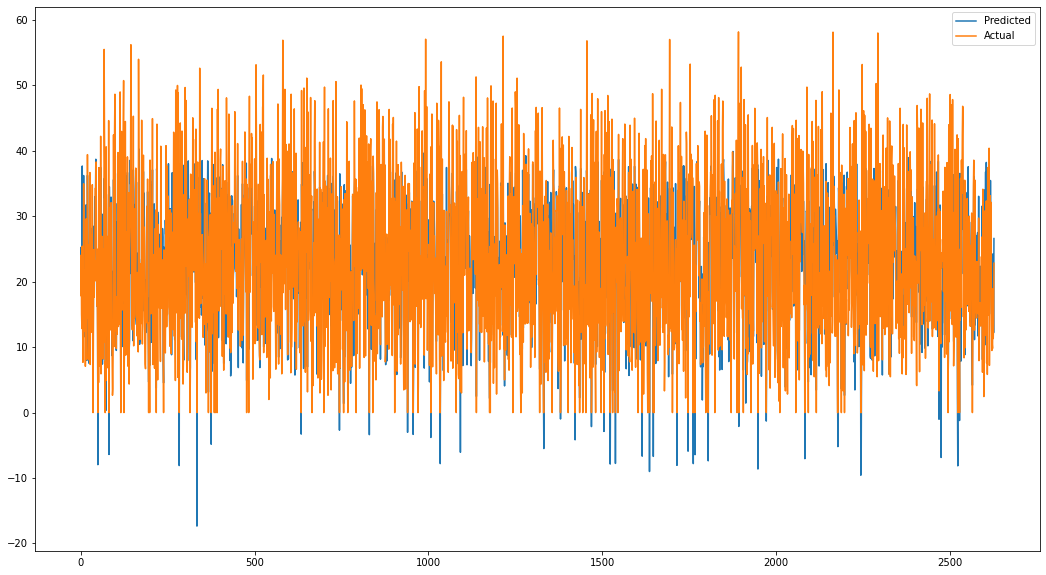

In [324]:
plt.figure(figsize=(18,10))
plt.plot(np.array(y_pred_test))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0, 'y_predicted')

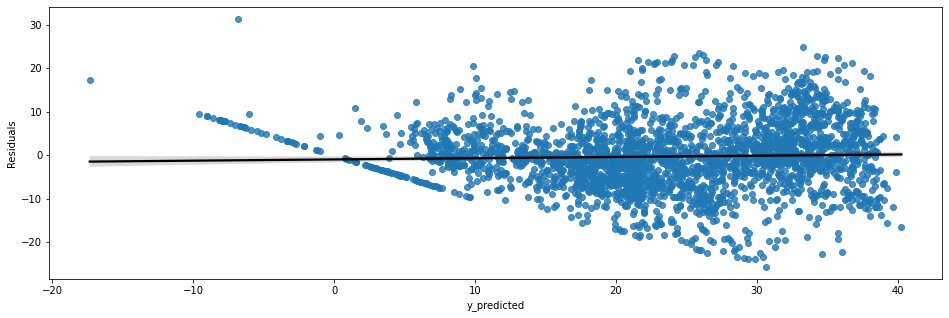

In [325]:
# Checking Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred_test,y=y_test-y_pred_test,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')